# Data Mining homework 1

### by Skander Chouchene

In [1]:
import pandas as pd # pandas
import seaborn as sns # seaborn package to generate nice plots
import matplotlib.pyplot as plt # matplotlib
import numpy as np # numpy
import statsmodels.stats.api as sms
import scipy
import scipy.stats as stats

In [2]:
# read data
data=pd.read_csv('tn_stock_data_2018.csv')
# convert date from string to datetime type
data.date=pd.to_datetime(data.date,format='%d/%m/%y')

In [3]:
data.drop("I",axis=1,inplace=True)

In [4]:
# show top observations from the data
data.head()

,date,C_GR_RLC,company_code,company,ref_price,yesterday_price,open,last,close,low,high,qty_traded,num_trades,value
0,2018-01-02,11,725001,ADWYA,5.35,5.35,5.25,5.39,5.39,5.25,5.39,2926,7,15635.50
1,2018-01-02,11,340005,AMEN BANK,24.35,24.35,24.38,24.00,24.00,24.00,24.38,1519,12,36918.00
2,2018-01-02,11,730001,ARTES,6.27,6.20,6.27,6.10,6.10,6.09,6.27,35875,67,219020.05
3,2018-01-02,11,714001,ASSAD,9.00,9.00,0.00,0.00,9.00,0.00,0.00,0,0,NaN
4,2018-01-02,11,360035,ATB,4.22,4.22,4.15,4.18,4.18,4.15,4.18,3705,7,15465.90


In [5]:
# calculate daily return for every company
data['currReturn']=data.groupby(['company'])['close'].pct_change()

In [6]:
# make a pivot to create a data matrix where columns are companies and rows are days; the values in the data matrix are for the returns
ret_data=data.pivot(index='date',columns='company',values='currReturn').dropna()

## Question 1: For the following 4 stocks ('ADWYA' ,'ELECTROSTAR', 'STEQ','SIMPAR'), plot the histogram of their returns and test for normality using jarque_bera test (sms.jarque_bera)? (make sure to interpret the results adequately); Next try Box-Cox transformation to see if you can make non gaussian data to be close to normal distribution.

In [7]:
list1=["ADWYA","ELECTROSTAR","STEQ","SIMPAR"]
data1=ret_data[list1]

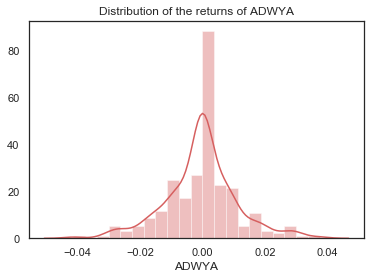

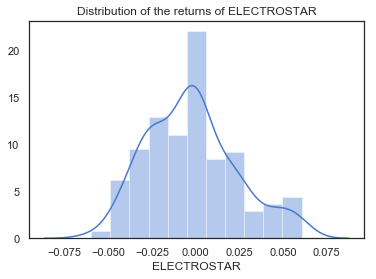

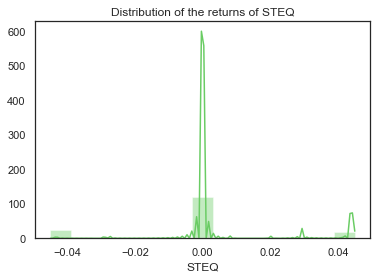

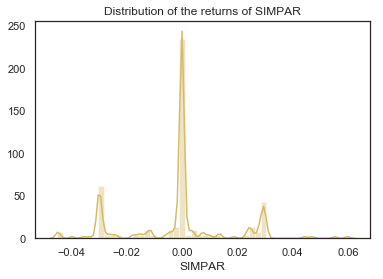

In [8]:
sns.set(style="white", palette="muted", color_codes=True)
cols=['r','b','g','y']
for i in range(len(list1)):
    sub_set=ret_data[list1[i]]
    sns.distplot(sub_set,color=cols[i])
    plt.title('Distribution of the returns of {}'.format(list1[i]))
    plt.show()

In [9]:
for i in range(len(list1)):
    sub_set=ret_data[list1[i]]
    test=sms.jarque_bera(sub_set)
    print('Normality test for the returns of {}, {}'.format(list1[i],test))

Normality test for the returns of ADWYA, (19.616419672283744, 5.4998214541427414e-05, -0.018144783972249483, 4.377333024852877)
Normality test for the returns of ELECTROSTAR, (8.825769938118468, 0.01212016155197131, 0.4547699277717589, 2.8361585541357446)
Normality test for the returns of STEQ, (5.594739121981925, 0.06097023034945145, -0.0776225733425154, 3.7192533010519697)
Normality test for the returns of SIMPAR, (2.510204429657288, 0.285046710734644, 0.11400300368472287, 3.4369625497970246)


### -> Interpretations:
#### The Jarque-Bera test returns four numberss: The Jarque-Bera test statistic, the p-value, the skewness and the kurtosis.
#### Therefore we can conclude that (at a 5% threshold):
    - ADWYA's returns follow a slightly left-skewed normal distribution with positive kurtosis.
    - ELECTROCAR's returns follow a right-skewed distribution.
    - STEQ's returns follow a normal distribution at 95%, as the p-value for the normalcy test is >0.05.
    - SIMPAR's returns follow a slightly right skewed distribution.
    - All the returns are each in a pointy distribution (kurtosis>0). The closest probability distribution is Laplace (kurtosis=3).

### Box Cox transformation

In [10]:
list1=["ADWYA","ELECTROSTAR","SIMPAR"]
boxcox_transform=[]
for i in range(len(list1)):
    sub_set=ret_data[list1[i]]
    sub_set=sub_set[sub_set>0]
    boxcox_transform.append(stats.boxcox(sub_set,alpha=0.05))
    
print("Boxcox transform affected for the returns of ADWYA, ELECTROSTAR and SIMPAR")    
for i in range(len(list1)):
    test=sms.jarque_bera(boxcox_transform[i][0])
    print('Normalcy test for the Box-Cox tranformation of {}, {}'.format(list1[i],test))  

Boxcox transform affected for the returns of ADWYA, ELECTROSTAR and SIMPAR
Normalcy test for the Box-Cox tranformation of ADWYA, (2.425506329033352, 0.2973774223797318, -0.027553370042523846, 2.2020919701587682)
Normalcy test for the Box-Cox tranformation of ELECTROSTAR, (3.4780293122814623, 0.17569343380051383, -0.07830753343592037, 2.0155232956130575)
Normalcy test for the Box-Cox tranformation of SIMPAR, (1.7908633120737, 0.40843125876601627, -0.351234396890451, 2.5278952249833893)


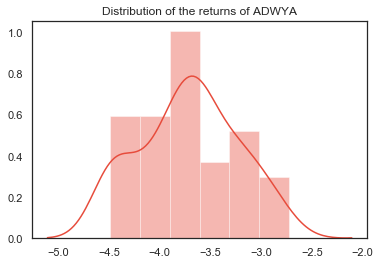

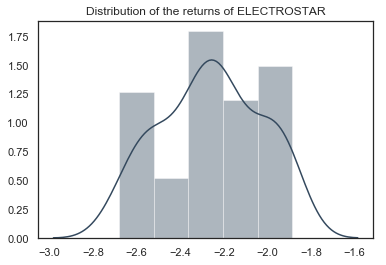

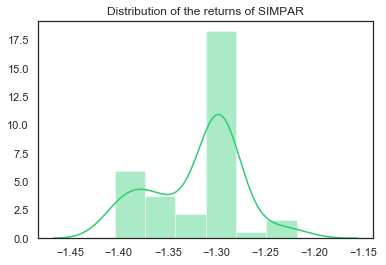

In [11]:
for i in range(len(list1)):
    cols=["#e74c3c", "#34495e", "#2ecc71"]
    sub_set=boxcox_transform[i][0]
    sns.distplot(sub_set,color=cols[i])
    plt.title('Distribution of the returns of {}'.format(list1[i]))
    plt.show()

### -> Observations:
#### After applying the Box-Cox transformation we can observe that the kurtosis has become slightly smaller all of the 3 stock return datas.  As for the skewness, it decreased as well, becoming closer to 0, except for ADWYA. However, the distribution plot have become more smooth and closer to a normal distribution.

## Question 2: For the following 4 stocks ('ICF','SOTETEL','TUNISAIR','ADWYA') calculate their sample mean and test if their mean return is statistically significant different than 0 using t-test (scipy.stats.ttest_1samp)?

In [12]:
list2=['ICF','SOTETEL','TUNISAIR','ADWYA']

In [13]:
for i in range(len(list2)):
    sub_set=ret_data[list2[i]]
    mu=sub_set.mean()
    print('The sample mean of the returns of {} is {}'.format(list2[i],mu))

The sample mean of the returns of ICF is 0.007793455388438318
The sample mean of the returns of SOTETEL is 0.0031937340536980644
The sample mean of the returns of TUNISAIR is 0.002673740619645195
The sample mean of the returns of ADWYA is -0.00048654606146330745


In [14]:
for i in range(len(list2)):
    sub_set=ret_data[list2[i]]
    test=stats.ttest_1samp(sub_set,0)
    print('The mean significance of the returns of {} is {}'.format(list2[i],test))

The mean significance of the returns of ICF is Ttest_1sampResult(statistic=4.952896840499316, pvalue=1.3566432304343701e-06)
The mean significance of the returns of SOTETEL is Ttest_1sampResult(statistic=2.0065920934886887, pvalue=0.04588311224346712)
The mean significance of the returns of TUNISAIR is Ttest_1sampResult(statistic=1.803160735162691, pvalue=0.07258163389319722)
The mean significance of the returns of ADWYA is Ttest_1sampResult(statistic=-0.6676140386289344, pvalue=0.5050032725817712)


### -> Interpretations:
#### T-test (Student) for the significance of the mean (at 5% threshold):
#### H0: Mean=0
#### H1: Mean<>0
    - ICF and SOTETEL's p-values are smaller than 0.05, therefore we reject H0. Their means are significant.
    - TUNISAIR and ADWYA's p-values are bigger than 0.05, therefore we accept H. Their means are equal to 0.

## Question 3: For the following 4 pairs of stocks ('SIPHAT','SOTUVER');('SIMPAR','TUNISAIR');('ADWYA','TPR');('ADWYA','AMS') calculate their sample mean returns and test if their mean return are statistically different using T-test for the means of two independent samples (scipy.stats.ttest_ind)? [note that we are assuming equal population variances ]

In [15]:
list3=[('SIPHAT','SOTUVER'),('SIMPAR','TUNISAIR'),('ADWYA','TPR'),('ADWYA','AMS')]

In [16]:
for i in range(len(list3)):
    comps=list(list3[i])
    sub_set=ret_data[comps]
    mu=sub_set.mean()
    print('The sample mean of the returns of {} is {}'.format(list3[i],mu).replace('company',''))

The sample mean of the returns of ('SIPHAT', 'SOTUVER') is 
SIPHAT    -0.002291
SOTUVER    0.002405
dtype: float64
The sample mean of the returns of ('SIMPAR', 'TUNISAIR') is 
SIMPAR     -0.001120
TUNISAIR    0.002674
dtype: float64
The sample mean of the returns of ('ADWYA', 'TPR') is 
ADWYA   -0.000487
TPR      0.001343
dtype: float64
The sample mean of the returns of ('ADWYA', 'AMS') is 
ADWYA   -0.000487
AMS      0.000052
dtype: float64


In [17]:
for i in range(len(list3)):
    comps=list(list3[i])
    sub_set=ret_data[comps]
    a=sub_set[comps[0]]
    b=sub_set[comps[1]]
    test=stats.ttest_ind(a,b)
    print('The statistical difference test of the returns of {} yields: {}'.format(list3[i],test))

The statistical difference test of the returns of ('SIPHAT', 'SOTUVER') yields: Ttest_indResult(statistic=-2.877999634638077, pvalue=0.004175414404598822)
The statistical difference test of the returns of ('SIMPAR', 'TUNISAIR') yields: Ttest_indResult(statistic=-1.9965876672752851, pvalue=0.04641827695194298)
The statistical difference test of the returns of ('ADWYA', 'TPR') yields: Ttest_indResult(statistic=-1.7399384714970962, pvalue=0.08249259466252643)
The statistical difference test of the returns of ('ADWYA', 'AMS') yields: Ttest_indResult(statistic=-0.3303851766980355, pvalue=0.7412490099332717)


### Interpretations:
#### T-test for two samples (at 5% threshold):
#### H0: Equal means
#### H1: Unequal means
    - Testing on ('ADWYA', 'TPR') and ('ADWYA', 'AMS') returns yields a p-value>0.05. Therefore we accept H0. The mean is equal between population samples.
    - Testing on ('SIPHAT', 'SOTUVER') and  ('SIMPAR', 'TUNISAIR') returns yields a p-value>0.05. Therefore we reject H0. The mean is unequal between population samples.

## Question 4: For the following 4 pairs of stocks ('ADWYA','ASTREE');('ALKIMIA','HEXABYTE');('BH','SIMPAR');('ALKIMIA','UBCI') calculate their sample variance of returns and test if the samples are from populations with equal variances using Levene test (scipy.stats.levene)? [note that the F-test we saw in class is sensitive to non-normality. Levene’s test is used in the cases where there are significant deviations from normality. ]

In [18]:
list4=[('ADWYA','ASTREE'),('ALKIMIA','HEXABYTE'),('BH','SIMPAR'),('ALKIMIA','UBCI') ]

In [19]:
for i in range(len(list3)):
    comps=list(list3[i])
    sub_set=ret_data[comps]
    mu=sub_set.var()
    print('The sample variance of the returns of {} is {}'.format(list3[i],mu).replace('company',''))

The sample variance of the returns of ('SIPHAT', 'SOTUVER') is 
SIPHAT     0.000415
SOTUVER    0.000245
dtype: float64
The sample variance of the returns of ('SIMPAR', 'TUNISAIR') is 
SIMPAR      0.000350
TUNISAIR    0.000545
dtype: float64
The sample variance of the returns of ('ADWYA', 'TPR') is 
ADWYA    0.000132
TPR      0.000142
dtype: float64
The sample variance of the returns of ('ADWYA', 'AMS') is 
ADWYA    0.000132
AMS      0.000527
dtype: float64


In [20]:
for i in range(len(list4)):
    comps=list(list4[i])
    sub_set=ret_data[comps]
    a=sub_set[comps[0]]
    b=sub_set[comps[1]]
    test=stats.levene(a,b)
    print('The Levene test of the returns of {} yields: {}'.format(list4[i],test))

The Levene test of the returns of ('ADWYA', 'ASTREE') yields: LeveneResult(statistic=89.87764908590637, pvalue=1.0606315909304815e-19)
The Levene test of the returns of ('ALKIMIA', 'HEXABYTE') yields: LeveneResult(statistic=4.806948332446832, pvalue=0.028810918585849166)
The Levene test of the returns of ('BH', 'SIMPAR') yields: LeveneResult(statistic=2.8240648085564715, pvalue=0.0934931251227355)
The Levene test of the returns of ('ALKIMIA', 'UBCI') yields: LeveneResult(statistic=0.15071400338548502, pvalue=0.6980212049736736)


### -> Interpretations:
#### Levene test:
#### H0: Equal variance between samples
#### H1: Unequal variance between samples
    - BH and SIMPAR's returns yield a p-value>0.05. Therefore we accept H0. The variance is equal between population samples.
    - The other returns yield p-values<0.05. Therefore we reject the null hypothesis. The variances are equal between samples.